# Import Dataset & Library

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import pearsonr
from statistics import mode 
from fractions import Fraction as Fr

In [54]:
df = pd.read_csv("/Users/asyzyni/Documents/COLLEGE👩🏻‍🏫/IPSD/Heart_disease_statlog.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3,0
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3,0
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1,0
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2,0


## Deskripsi Tiap Fitur ## 

1. Age: Patients Age in years (Numeric)

2. Sex: Gender (Male : 1; Female : 0) (Nominal)

3. cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)

4. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)

5. chol: Serum cholesterol in mg/dl (Numeric)

6. fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)

8. thalach: Maximum heart rate achieved (Numeric)

9. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)

10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)

11. slope: ST segment measured in terms of slope during peak exercise, 0: up sloping; 1: flat; 2: down sloping(Nominal)

12. ca: The number of major vessels (0–3)(nominal)

13. thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)


# Eksplorasi Data

In [55]:
# Cek tipe data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [56]:
# cek missing values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
# hapus target karena tidak diperlukan kali ini 
df = df.drop(columns='target')

In [58]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2


# Statistic Summary

In [59]:
# mean 
print(f"Rata-rata Per-Kolom : ")
print(df.mean())

Rata-rata Per-Kolom : 
age          54.433333
sex           0.677778
cp            2.174074
trestbps    131.344444
chol        249.659259
fbs           0.148148
restecg       1.022222
thalach     149.677778
exang         0.329630
oldpeak       1.050000
slope         0.585185
ca            0.670370
thal          1.822222
dtype: float64


In [60]:
# Standard Deviation 
print("Standar Deviasi per kolom : ")
df.std()

Standar Deviasi per kolom : 


age          9.109067
sex          0.468195
cp           0.950090
trestbps    17.861608
chol        51.686237
fbs          0.355906
restecg      0.997891
thalach     23.165717
exang        0.470952
oldpeak      1.145210
slope        0.614390
ca           0.943896
thal         0.959140
dtype: float64

In [61]:
# Varians 

print("Varians : ")
df.var()

Varians : 


age           82.975093
sex            0.219207
cp             0.902671
trestbps     319.037051
chol        2671.467107
fbs            0.126669
restecg        0.995787
thalach      536.650434
exang          0.221795
oldpeak        1.311506
slope          0.377475
ca             0.890940
thal           0.919950
dtype: float64

In [62]:
# Range 

print("Range per- Kolom")
print(df.max() - df.min())

Range per- Kolom
age          48.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            3.0
thal          2.0
dtype: float64


In [63]:
# Cek Median 
def median_as_fraction(series):
    return Fr(series.median()).limit_denominator()

# Menghitung median dari tiap kolom numerik dalam bentuk fraction
median_fractions = df.select_dtypes(include=[float, int]).apply(median_as_fraction)


print("median per kolom : ")
print(median_fractions)



median per kolom : 
age            55
sex             1
cp              2
trestbps      130
chol          245
fbs             0
restecg         2
thalach     307/2
exang           0
oldpeak       4/5
slope           1
ca              0
thal            1
dtype: object


In [64]:
# Mengecek kolom yang berisi outlier


# Loop untuk memeriksa setiap kolom
for col in df:
    Q1 = df[col].quantile(0.25)  # Kuartil pertama
    Q3 = df[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang Interkuartil
    
    # Tentukan batas bawah dan atas untuk outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Deteksi outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:  # Jika ada outliers
        print(f"Outliers ditemukan di kolom {col}")
        outliers_found = True

# Jika tidak ada outliers di semua kolom
if not outliers_found:
    print("Tidak ada outliers yang ditemukan di kolom-kolom yang diperiksa.")

Outliers ditemukan di kolom cp
Outliers ditemukan di kolom trestbps
Outliers ditemukan di kolom chol
Outliers ditemukan di kolom fbs
Outliers ditemukan di kolom thalach
Outliers ditemukan di kolom oldpeak
Outliers ditemukan di kolom ca


## Feature Engineering for Visualization

df.columns = ['age',
              'sex',
              'chest_pain_type',
              'resting_blood_pressure', 
              'cholesterol',
              'fasting_blood_sugar',
              'rest_ecg',
              'max_heart_rate_achieved',
              'exercise_induced_angina',
              'st_depression',
              'st_slope',
              'ca',
              'thalassemia']


df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina '
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-angina pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'Abnormality in ST-T wave'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'null'
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal blood flow'
df['thalassemia'][df['thalassemia'] == 3] = 'reversible defect'

df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')


In [65]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2


# Visualisasi Data 

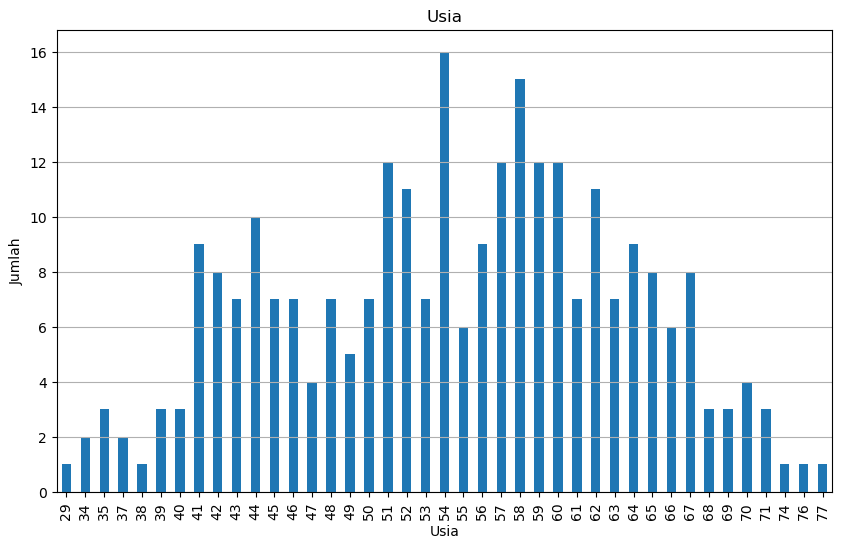

In [66]:
# age visualization

plt.figure(figsize=(10,6))
df['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.grid(True, axis='y')
plt.show()


Text(0.5, 1.0, 'Distribution of Gender')

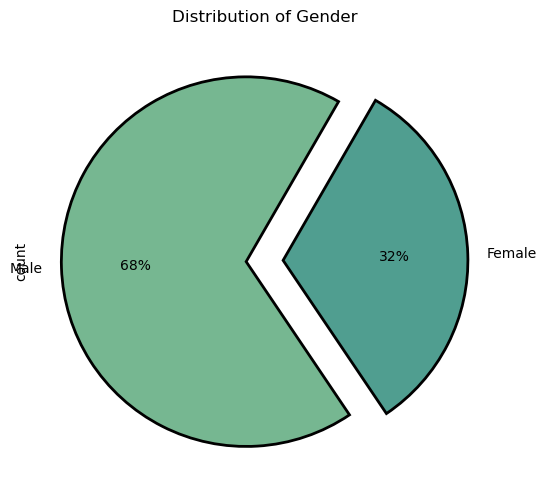

In [67]:
# gender distribution 

plt.figure(figsize=(10,6))
df['sex'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("crest",5), startangle = 60,labels=["Male","Female"], wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =False)
plt.title("Distribution of Gender")




/var/folders/v6/s7jbz6sn6qv9dh421jb6jbsm0000gn/T/ipykernel_71208/830182338.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


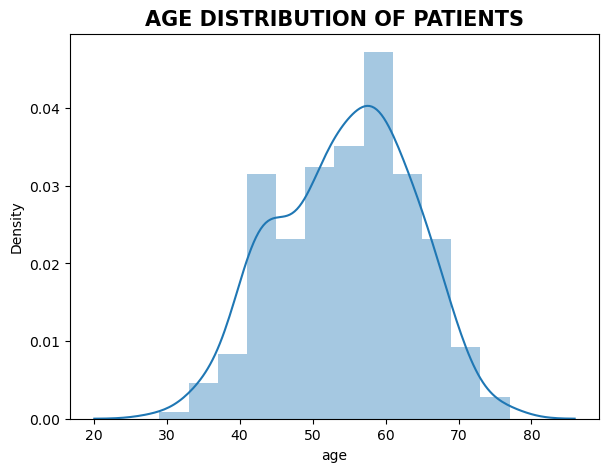

In [76]:
# Age Distribution of Normal Patiens 
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df['age'])
plt.title('AGE DISTRIBUTION OF PATIENTS', fontsize=15, weight='bold')
plt.show()

Text(0.5, 1.0, 'CHEST PAIN OF PATIENTS')

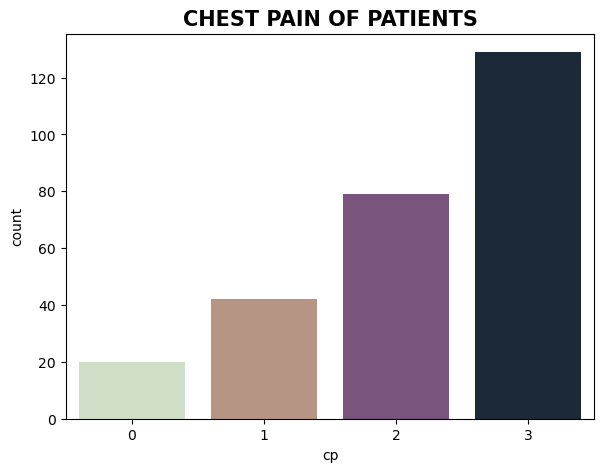

In [75]:
# plotting chest pain of patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df['cp'],palette = 'ch:start=4.2,rot=-3.3')
plt.title('CHEST PAIN OF PATIENTS', fontsize=15, weight='bold')


KeyError: 'rest_ecg'

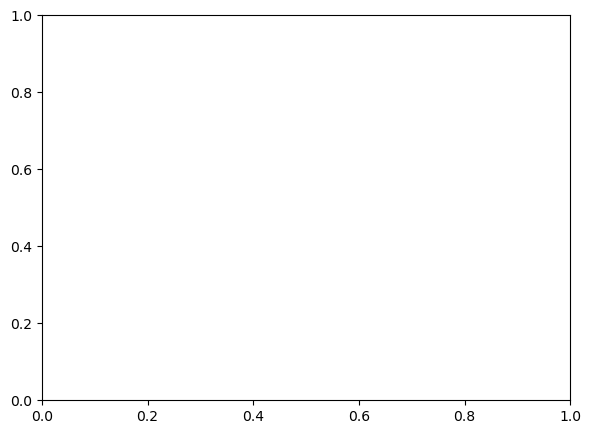

In [71]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df['rest_ecg'], palette ='ch:start=.2,rot=-.3')
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df['rest_ecg'], palette='cubehelix')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

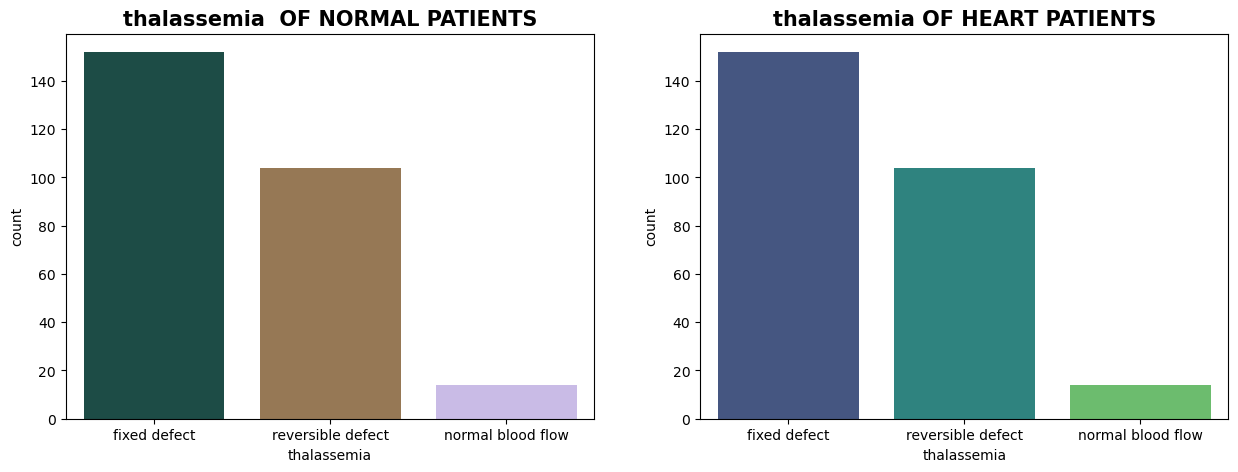

In [48]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df['thalassemia'],palette='cubehelix')
plt.title('thalassemia  OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df['thalassemia'], palette='viridis')
plt.title('thalassemia OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

# Correlation

In [78]:
df = df.apply(pd.to_numeric, errors='coerce')
correlation = df.corr(method='pearson')
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.099055
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.376936
cp,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.266614
trestbps,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.127273
chol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.040317
fbs,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.044770
restecg,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.004143
thalach,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.241003
exang,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.319499
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.325240


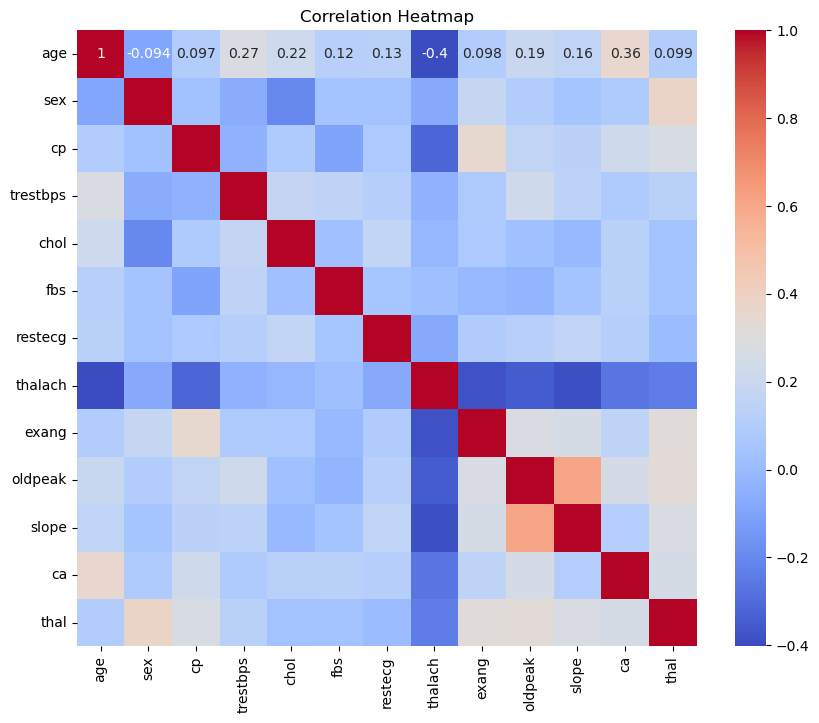

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()